In [86]:
import os
import warnings
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import pickle
import plotly.graph_objects as go
import plotly.express as px 
from sklearn.svm import SVC
from sklearn import tree
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_curve
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder,OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import *
from sklearn.model_selection import GridSearchCV
pd.set_option('display.max_columns',None)
warnings.filterwarnings('ignore')

## <font color='Green'>1.0 Loading Data</font>

In [87]:
df =pd.read_csv('automobile.csv')
df.head(5)

,ID,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


## <font color='Green'>1.1 Understanding the Dataset</font>

In [88]:
df.describe()

,ID,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,204.000000,204.000000,163.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.00000,200.000000,200.000000,204.000000,202.000000,202.000000,204.000000,204.000000,200.000000
mean,102.367647,0.833333,121.840491,98.781373,174.131373,65.918137,53.740196,2557.352941,127.04902,3.331250,3.254750,10.155000,104.267327,5123.514851,25.225490,30.754902,13230.375000
std,59.233920,1.248316,35.492292,6.026096,12.311367,2.145361,2.439646,521.330463,41.69556,0.273397,0.317368,3.977791,39.812719,479.794755,6.557674,6.903182,7960.155239
min,0.000000,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.00000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,51.750000,0.000000,94.000000,94.500000,166.675000,64.100000,52.000000,2145.000000,97.00000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,102.500000,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2417.000000,120.00000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10320.000000
75%,153.250000,2.000000,150.000000,102.400000,183.200000,66.900000,55.500000,2939.250000,142.00000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.500000,16500.750000
max,204.000000,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.00000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 204 non-null    int64  
 1   symboling          204 non-null    int64  
 2   normalized-losses  163 non-null    float64
 3   make               204 non-null    object 
 4   fuel-type          204 non-null    object 
 5   aspiration         204 non-null    object 
 6   num-of-doors       203 non-null    object 
 7   body-style         204 non-null    object 
 8   drive-wheels       204 non-null    object 
 9   engine-location    204 non-null    object 
 10  wheel-base         204 non-null    float64
 11  length             204 non-null    float64
 12  width              204 non-null    float64
 13  height             204 non-null    float64
 14  curb-weight        204 non-null    int64  
 15  engine-type        204 non-null    object 
 16  num-of-cylinders   204 non

In [90]:
#Dropping ID which is not required for the analysis
df.drop('ID', axis=1, inplace=True)

In [31]:
cont_features = []
cat_features = []

for c in df.columns:
    if df[c].dtype == 'int64':
        print(df[c].dtype)
        cont_features += [c]
    else:
        print(df[c].dtype)
        cat_features += [c]
# df[cat_features].nunique()
df[cont_features].nunique()

int64
float64
object
object
object
object
object
object
object
float64
float64
float64
float64
int64
object
object
int64
object
float64
float64
float64
float64
float64
int64
int64
float64


normalized-losses     51
make                  22
fuel-type              2
aspiration             2
num-of-doors           2
body-style             5
drive-wheels           3
engine-location        2
wheel-base            53
length                75
width                 44
height                49
engine-type            7
num-of-cylinders       7
fuel-system            8
bore                  38
stroke                36
compression-ratio     32
horsepower            59
peak-rpm              23
price                186
dtype: int64

## Checking for Missing Values

In [91]:
df.isna().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          1
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

### Missing values: 
normalized-losses: 41, num-of-doors: 2, bore: 4, stroke: 4, horsepower: 2, peak-rpm: 2, price: 4

## Finding proportion of missing values

In [93]:
# Finding proportion of missing values in entire data

# Size and shape of the dataframe
print("Size of the dataframe:", df.size)
print("Shape of the dataframe:", df.shape)

# Overall dataframe
print("Count of all missing values in dataframe: ", df.isnull().sum().sum())

# Overall % of missing values in the dataframe
print("% of missing values in dataframe: ", round((df.isnull().sum().sum()/df.size)*100,2),"%")


Size of the dataframe: 5304
Shape of the dataframe: (204, 26)
Count of all missing values in dataframe:  58
% of missing values in dataframe:  1.09 %


Overall missing values is < 10%

## <font color='Green'>1.2 Missing Value Analysis</font>

### <font color='Blue'>Complete Cases Approach</font>
We ignore the cases with missing values and use the rest

In [94]:
df_cc = df.dropna()
print("Original data:",df.shape)
print("After removing cases with missing values:",df_cc.shape)

Original data: (204, 26)
After removing cases with missing values: (159, 26)


In [95]:
df_cc.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

## <font color='Green'>1.3 Data Visualisation</font>

<AxesSubplot:>

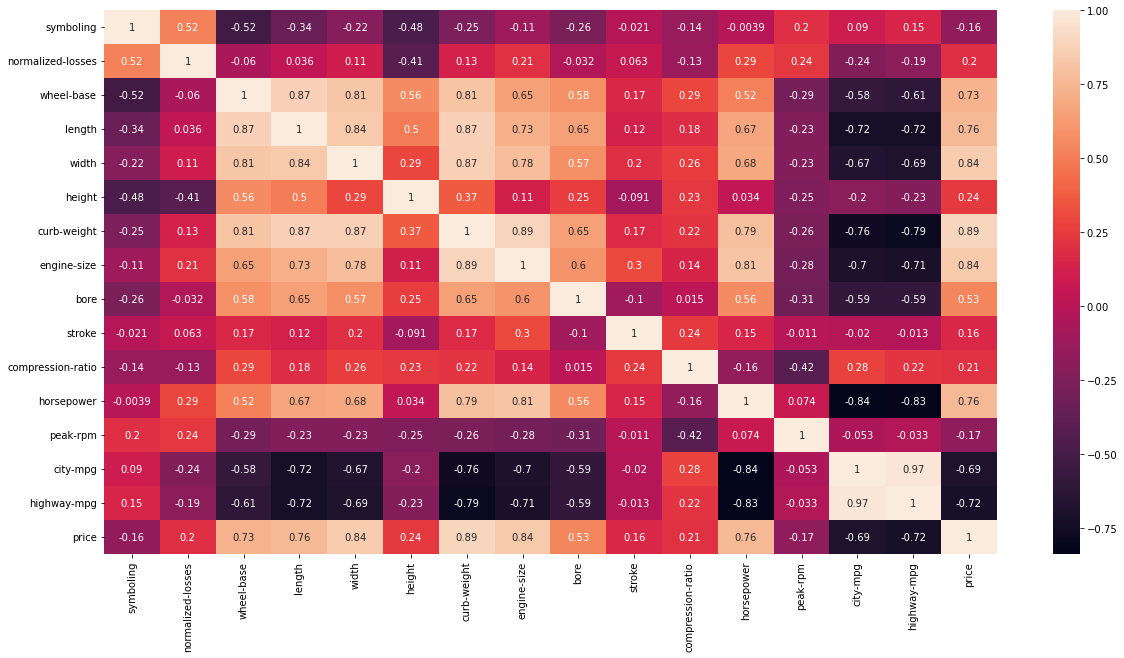

In [96]:
import seaborn as sn

correlations=df_cc.corr()
f,ax=plt.subplots(figsize=(20,10))

sn.heatmap(correlations,annot=True)

## <font color='Green'>1.4 Detecting and Removing Outliers</font>

In [97]:
from scipy.stats import zscore
import matplotlib.pyplot as plt
columns = ['wheel-base','length','width','height','bore','stroke','compression-ratio','horsepower','peak-rpm',
           'city-mpg','highway-mpg','price']
df_cc1 = df_cc[columns]
df_cc1 = df_cc1.apply(zscore)
df_cc1.head()

,wheel-base,length,width,height,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
3,0.298157,0.364430,0.305113,0.177143,-0.413240,0.556703,-0.041559,0.201279,0.831733,-0.414945,-0.323313,0.427398
4,0.220504,0.364430,0.408113,0.177143,-0.413240,0.556703,-0.557392,0.625812,0.831733,-1.402122,-1.565772,1.024734
6,1.462948,1.766029,2.983113,0.796169,-0.413240,0.556703,-0.428433,0.462530,0.831733,-1.237593,-1.099850,1.069108
8,1.462948,1.766029,2.983113,0.884602,-0.638386,0.556703,-0.480017,1.442223,0.831733,-1.566652,-1.876386,2.121274
10,0.569942,0.381841,-0.415887,0.177143,0.750015,-1.484399,-0.351058,0.168622,1.477884,-0.579475,-0.478620,0.850653


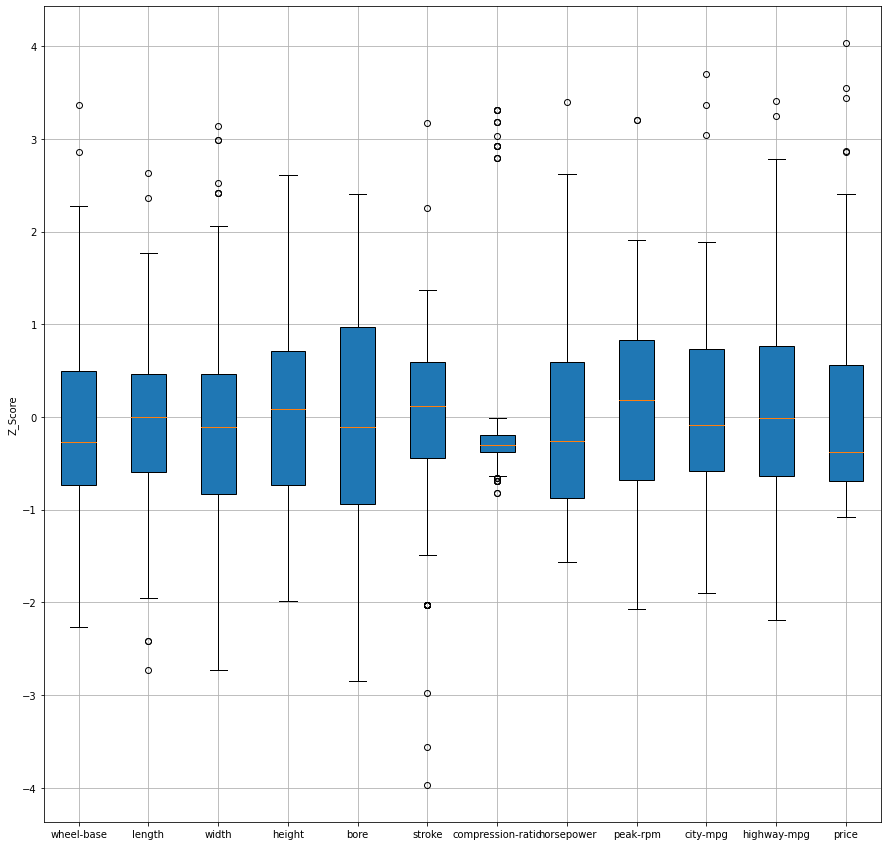

In [98]:
fig = plt.figure(figsize = (15,15))
box = plt.boxplot(df_cc1, vert=True, patch_artist=True, labels=df_cc1.columns);
fig = plt.ylabel('Z_Score', fontsize=10);
fig = plt.grid()

<b> Inference </b>

From the box plot, we can notice that fewer variables 'wheel-base','length','width','stroke','compression-ratio' have several outliers. The outliers have to removed in the data processing step.

<b> Cut-offs for Outliers </b>


In [99]:
df_cc['z_score_tc'] = zscore( df_cc['price'] )

In [100]:
df_cc[ ( df_cc.z_score_tc > 3.0) | ( df_cc.z_score_tc < -3.0) ]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,z_score_tc
46,0,145.0,jaguar,gas,std,four,sedan,rwd,front,113.0,199.6,69.6,52.8,4066,dohc,six,258,mpfi,3.63,4.17,8.1,176.0,4750.0,15,19,32250.0,3.550615
69,-1,93.0,mercedes-benz,diesel,turbo,four,sedan,rwd,front,115.6,202.6,71.7,56.3,3770,ohc,five,183,idi,3.58,3.64,21.5,123.0,4350.0,22,25,31600.0,3.439681
71,3,142.0,mercedes-benz,gas,std,two,convertible,rwd,front,96.6,180.3,70.5,50.8,3685,ohcv,eight,234,mpfi,3.46,3.10,8.3,155.0,4750.0,16,18,35056.0,4.029508


In [101]:
df_cc = df_cc.drop([46,69,71])
df_cc = df_cc.drop(['z_score_tc'],axis=1)
df_cc.shape 

(156, 26)

## <font color='Green'>1.5 Scaling the Data</font>


In [103]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_cc1),columns = df_cc1.columns)
df_scaled.describe()

,wheel-base,length,width,height,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,1.590000e+02,1.590000e+02,1.590000e+02,1.590000e+02,1.590000e+02,1.590000e+02,1.590000e+02,1.590000e+02,1.590000e+02,1.590000e+02,1.590000e+02,1.590000e+02
mean,3.910219e-17,1.592018e-16,-9.216946e-17,7.680788e-17,1.578053e-16,-1.431420e-17,-1.024687e-16,-7.820439e-17,7.122185e-17,-6.563583e-17,-1.256856e-17,4.887774e-17
std,1.003160e+00,1.003160e+00,1.003160e+00,1.003160e+00,1.003160e+00,1.003160e+00,1.003160e+00,1.003160e+00,1.003160e+00,1.003160e+00,1.003160e+00,1.003160e+00
min,-2.264382e+00,-2.726052e+00,-2.733387e+00,-1.989450e+00,-2.852323e+00,-3.967739e+00,-8.153080e-01,-1.562169e+00,-2.075946e+00,-1.895711e+00,-2.187001e+00,-1.079938e+00
25%,-7.307413e-01,-5.888313e-01,-8.278868e-01,-7.292889e-01,-9.385807e-01,-4.468386e-01,-3.768500e-01,-8.763838e-01,-6.759523e-01,-5.794748e-01,-6.339275e-01,-6.952536e-01
50%,-2.648250e-01,-1.204546e-03,-1.068868e-01,8.871045e-02,-1.130451e-01,1.144643e-01,-2.994751e-01,-2.559115e-01,1.855821e-01,-8.588645e-02,-1.269809e-02,-3.776412e-01
75%,4.922888e-01,4.688969e-01,4.596132e-01,7.077369e-01,9.751611e-01,5.907213e-01,-1.963085e-01,5.931560e-01,8.317329e-01,7.367609e-01,7.638387e-01,5.587265e-01
max,3.365439e+00,2.627881e+00,3.137613e+00,2.609033e+00,2.401086e+00,3.176117e+00,3.311356e+00,3.401610e+00,3.200952e+00,3.698291e+00,3.404064e+00,4.029508e+00


## <font color='Green'>1.6 Dimensionality Reduction</font>

#### K-means Clustering, Hierarchial clustering use the Euclidean distance, which gets affected as the number of dimensions increase. So, before using these methods, we have to reduce the number of dimensions. Hence, we are using PCA which is by far the most popular dimensionality reduction algorithm.

In [104]:
from sklearn.decomposition import PCA
pca= PCA()
pca.fit(df_scaled)

PCA()

In [105]:
pca.components_

array([[ 0.34785218,  0.37441904,  0.3631538 ,  0.16323429,  0.2942379 ,
         0.0505824 ,  0.03914443,  0.33221064, -0.08375651, -0.34728408,
        -0.35309077,  0.35631157],
       [ 0.22356318,  0.10553379,  0.10565847,  0.31613992,  0.00750663,
         0.13924081,  0.58835607, -0.27512795, -0.47299751,  0.29977549,
         0.26817683,  0.03099295],
       [ 0.02369606,  0.04148332, -0.14264301,  0.40831326,  0.26833576,
        -0.76922248, -0.22323219, -0.17159024, -0.19673903, -0.03903051,
        -0.04043104, -0.16063455],
       [ 0.20376193,  0.13177193, -0.04143196,  0.64347971, -0.3910838 ,
         0.13718882, -0.0410838 , -0.12921433,  0.57377709, -0.01820153,
        -0.02619987, -0.07032128],
       [-0.01403841, -0.02069634,  0.2183108 , -0.24445934, -0.1957925 ,
        -0.57481562,  0.48536657,  0.06493227,  0.39947404,  0.11938227,
         0.06124102,  0.32531201],
       [-0.08430449, -0.07809515,  0.06666212,  0.04767067, -0.76330773,
        -0.12521037, -

In [106]:
pca.explained_variance_

array([6.15091261, 2.05120551, 1.24973146, 0.83737803, 0.56353126,
       0.38198295, 0.26236274, 0.20155574, 0.1468678 , 0.12050982,
       0.08666292, 0.02324853])

### Analyzing Results - Explained Variance

In [107]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.5093523 , 0.16985874, 0.10348929, 0.06934262, 0.04666559,
       0.03163171, 0.02172605, 0.01669067, 0.01216201, 0.00997932,
       0.00717649, 0.00192519])

### Analyzing Results - Scree Plot

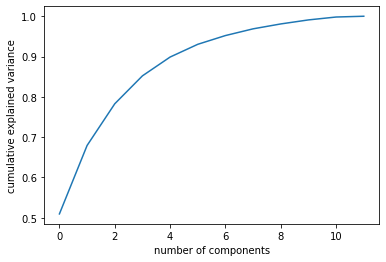

In [108]:
plt.plot(pca.explained_variance_ratio_.cumsum())
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

<b> We can see that at n_components = 7, we can capture 95% of variance in the data. </b>

### Executing PCA with 7 components

In [109]:
pca = PCA(n_components=7)
labels = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7']
df_scaled_PCA = pd.DataFrame(pca.fit_transform(df_scaled),columns = labels)

### Understanding the PCA data

In [110]:
df_scaled_PCA.describe()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
count,1.590000e+02,1.590000e+02,1.590000e+02,1.590000e+02,1.590000e+02,1.590000e+02,1.590000e+02
mean,-6.703233e-17,3.281791e-17,2.548625e-17,-3.980045e-17,1.605983e-17,-3.491267e-18,-2.374062e-17
std,2.480103e+00,1.432203e+00,1.117914e+00,9.150836e-01,7.506872e-01,6.180477e-01,5.122136e-01
min,-6.419292e+00,-2.946859e+00,-3.027363e+00,-2.133965e+00,-1.774734e+00,-1.409866e+00,-1.234456e+00
25%,-2.023323e+00,-8.097650e-01,-7.632839e-01,-6.371174e-01,-3.998593e-01,-3.064365e-01,-3.904681e-01
50%,-2.524995e-01,-2.202330e-01,-1.108700e-01,2.133919e-02,-1.054212e-01,-2.551090e-02,4.156915e-03
75%,1.801396e+00,2.519642e-01,6.867493e-01,5.576630e-01,5.209028e-01,3.333498e-01,3.394876e-01
max,6.628805e+00,4.018251e+00,3.435482e+00,2.902558e+00,2.765473e+00,2.975714e+00,1.510192e+00


### Finding which features contribute to the PCA component

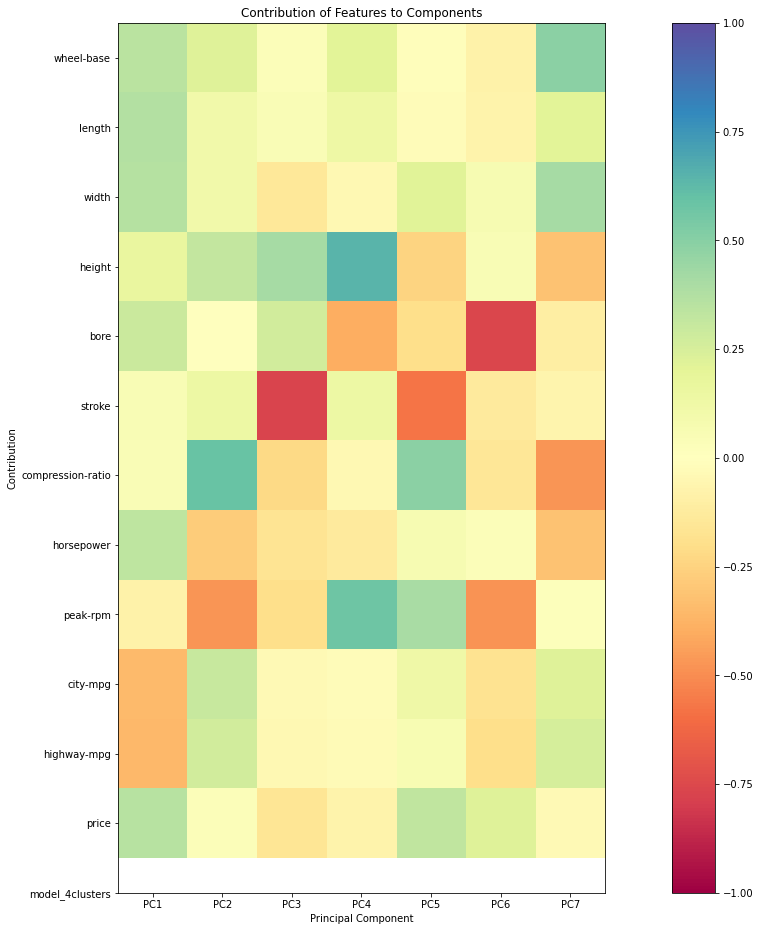

In [128]:
fig, ax = plt.subplots(figsize=(24, 16))
plt.imshow(pca.components_.T,
           cmap="Spectral",
           vmin=-1,
           vmax=1,
          )
plt.yticks(range(len(df_scaled.columns)), df_scaled.columns)
plt.xticks(range(len(df_scaled_PCA.columns)), df_scaled_PCA.columns)
plt.xlabel("Principal Component")
plt.ylabel("Contribution")
plt.title("Contribution of Features to Components")
plt.colorbar()

## <font color='Green'>Model Building</font>

## <font color='Green'>2.1 Building K-Means Cluster Model</font>

In [118]:
import collections 
from sklearn.cluster import KMeans
def CountFrequency(arr): 
    return collections.Counter(arr)

Counter({0: 159})
Counter({1: 86, 0: 73})
Counter({1: 62, 2: 58, 0: 39})
Counter({2: 57, 1: 53, 3: 40, 0: 9})
Counter({4: 52, 2: 51, 0: 40, 3: 9, 1: 7})
Counter({3: 56, 2: 38, 4: 35, 1: 14, 5: 9, 0: 7})
Counter({0: 50, 2: 43, 4: 27, 1: 15, 6: 9, 5: 8, 3: 7})
Counter({4: 41, 5: 34, 7: 21, 3: 19, 0: 16, 1: 13, 6: 8, 2: 7})
Counter({6: 27, 7: 26, 4: 24, 1: 22, 2: 20, 8: 13, 3: 12, 5: 8, 0: 7})
Counter({2: 31, 9: 26, 0: 23, 7: 20, 1: 19, 6: 13, 3: 8, 8: 7, 5: 7, 4: 5})
cluster_errors: [1816.542520172245, 1139.6459091783045, 959.7125550517167, 815.1460899726046, 709.9943260722448, 615.7755570505301, 550.4112198297769, 502.4802804332869, 426.64900832966225, 401.5449734180206]


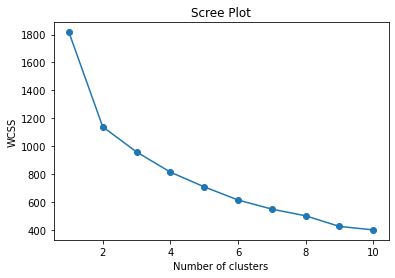

In [119]:
cluster_range = range( 1, 11 )
cluster_errors = []  # Captures WSS

for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit( df_scaled_PCA )
    cluster_errors.append( clusters.inertia_ )
    print(CountFrequency(clusters.labels_))
   
print("cluster_errors:", cluster_errors)
plt.figure(figsize=(6,4))
plt.plot( cluster_range, cluster_errors, marker = "o" );
plt.xlabel('Number of clusters');
plt.ylabel('WCSS');
plt.title( "Scree Plot");

Size wise = cluster solutions containing 4 and 5 clusters look good 

Let's see the performance Measures and select the best cluster solution

In [129]:
model_3clusters = KMeans(n_clusters=3).fit(df_scaled_PCA).labels_
model_4clusters = KMeans(n_clusters=4).fit(df_scaled_PCA).labels_

###  <font color='Green'>2.2 Measuring the Performance</font>

###  Performance Measure: Silhouette Score

In [132]:
from sklearn import metrics
print("Silhouette Coefficient for 3 clusters: %0.3f"% metrics.silhouette_score(df_scaled_PCA, model_3clusters))
print("Silhouette Coefficient for 4 clusters: %0.3f"% metrics.silhouette_score(df_scaled_PCA, model_4clusters))

## Silhouette score between -1 and 1

Silhouette Coefficient for 3 clusters: 0.236
Silhouette Coefficient for 4 clusters: 0.267


###  Performance Measure: Calinski-Harabasz index

In [133]:
print("Calinski-Harabasz index of 3 clusters: %0.3f"% metrics.calinski_harabasz_score(df_scaled_PCA, model_3clusters))
print("Calinski-Harabasz index of 4 clusters: %0.3f"% metrics.calinski_harabasz_score(df_scaled_PCA, model_4clusters))

Calinski-Harabasz index of 3 clusters: 69.633
Calinski-Harabasz index of 4 clusters: 63.248


    From the performance metrics, we can notice that 3 cluster solution is performing better and is also the elbow point

###  <font color='Green'>2.3 Examining Chararcteristics with 3 cluster solution</font>

In [135]:
df_scaled["model_3clusters"] = model_3clusters
cluster_size3 = df_scaled.groupby(['model_3clusters']).size() 
print(cluster_size3)
print("")

model_3clusters
0    63
1    44
2    52
dtype: int64



In [136]:
values=['wheel-base','length','width']
index =['model_3clusters']
aggfunc={'wheel-base': np.mean,
         'length': np.mean,
         'width': np.mean}
result = pd.pivot_table(df_scaled,values=values,
                             index =index,
                             aggfunc=aggfunc,
                             fill_value=0)
result['cluster_size'] = cluster_size3
result = result.round(2)
result

,length,wheel-base,width,cluster_size
model_3clusters,,,,
0,-0.02,-0.16,-0.16,63
1,1.18,1.17,1.23,44
2,-0.98,-0.80,-0.85,52


<b> Insights: </b>

Classification on the basis of cluster size, cluster 0 is the larger cluster containing 63 data points followed by cluster 2 with 52 data points and the last is cluster 1 with 44 data points.

We can notice that cluster 0 & 2 has lowest length, width & wheel base of the automobile model whereas cluster 1 has all the three features higher than other two.

In [137]:
values=['height','bore','stroke']
index =['model_3clusters']
aggfunc={'height': np.mean,
         'bore': np.mean,
         'stroke': np.mean}
result = pd.pivot_table(df_scaled,values=values,
                             index =index,
                             aggfunc=aggfunc,
                             fill_value=0)
result['cluster_size'] = cluster_size3
result = result.round(2)
result

,bore,height,stroke,cluster_size
model_3clusters,,,,
0,0.16,-0.11,0.02,63
1,0.86,0.57,0.08,44
2,-0.92,-0.34,-0.09,52


<b> Insights: </b>

Cluster 1 has models with highest diameter of each wheel in the automobile (bore), with highest height and highest number of phases in engine's cycle(stroke).

Cluster 2 has models with lowest diameter of each wheel(bore), lowest height of the model and low number of phases in engine's cycle(stroke).

Cluster 0 has models with less height but medium diameter of each wheel and number of phases in engine's cycle of the model.


In [138]:
values=['compression-ratio','horsepower','peak-rpm']
index =['model_3clusters']
aggfunc={'compression-ratio': np.mean,
         'horsepower': np.mean,
         'peak-rpm': np.mean}
result = pd.pivot_table(df_scaled,values=values,
                             index =index,
                             aggfunc=aggfunc,
                             fill_value=0)
result['cluster_size'] = cluster_size3
result = result.round(2)
result

,compression-ratio,horsepower,peak-rpm,cluster_size
model_3clusters,,,,
0,-0.31,-0.02,-0.04,63
1,0.24,1.15,-0.15,44
2,0.17,-0.95,0.17,52


<b> Insights: </b>

Cluster 1 has models with highest volume of cylinder and chamber (compression-ratio) in the engine with highest power automobile (horsepower) but low revolutions per minute (peak-rpm)

Cluster 0 has models with lowest volume of cylinder and chamber in the engine (compression-ratio), low power automobile (horsepower) and low revolutions per minute ((peak-rpm)

Cluster 2 has models with lowest power automobile (horsepower) but medium volume of cylinder and chamber of the engine (compression-ratio) with medium revolutions per minute (peak-rpm)

In [189]:
values=['city-mpg','highway-mpg','price']
index =['model_3clusters']
aggfunc={'city-mpg': np.mean,
         'highway-mpg': np.mean,
         'price': np.mean}
result = pd.pivot_table(df_scaled,values=values,
                             index =index,
                             aggfunc=aggfunc,
                             fill_value=0)
result['cluster_size'] = cluster_size3
result = result.round(2)
result

,city-mpg,highway-mpg,price,cluster_size
model_3clusters,,,,
0,-0.20,-0.18,-0.25,97
1,-1.02,-1.04,1.29,39
2,1.10,1.09,-0.79,23


<b> Insights: </b>

Cluster 2 has cheapest automobile models (price) with highest scoring car in an average city (city-mpg) & highway (highway-mpg)

Cluster 1 are the most expensive automobile models with lowest scoring car in an average city or highway as it is pretty obviuos that in an average city or highway the number of expensive cars would be less due to affordability of the citizens and road infrastructure

Cluster 0 has average price automobile model with medium score in city & highway and highest number of data points

### CONCLUSION

<ul>
    <li>Cluster 0: It has the highest number of data points </li>
    <li>Cluster 1: </li>
        <li>Cluster 2: </li>  
</ul>    

## <font color='Green'>3.1 Building Hierarchial Clustering Model</font>

In [177]:
from sklearn.cluster import AgglomerativeClustering
clusterid3 = AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward').fit(df_scaled_PCA).labels_
clusterid4 = AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='ward').fit(df_scaled_PCA).labels_
clusterid5 = AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward').fit(df_scaled_PCA).labels_
clusterid6 = AgglomerativeClustering(n_clusters=6,affinity='euclidean',linkage='ward').fit(df_scaled_PCA).labels_
clusterid7 = AgglomerativeClustering(n_clusters=7,affinity='euclidean',linkage='ward').fit(df_scaled_PCA).labels_
clusterid8 = AgglomerativeClustering(n_clusters=8,affinity='euclidean',linkage='ward').fit(df_scaled_PCA).labels_
clusterid9 = AgglomerativeClustering(n_clusters=9,affinity='euclidean',linkage='ward').fit(df_scaled_PCA).labels_
clusterid10 = AgglomerativeClustering(n_clusters=10,affinity='euclidean',linkage='ward').fit(df_scaled_PCA).labels_

# Assign Cluster Labels

In [178]:
df_scaled_PCA["clusterid3"] = clusterid3
df_scaled_PCA["clusterid4"] = clusterid4
df_scaled_PCA["clusterid5"] = clusterid5
df_scaled_PCA["clusterid6"] = clusterid6
df_scaled_PCA["clusterid7"] = clusterid7
df_scaled_PCA["clusterid8"] = clusterid8
df_scaled_PCA["clusterid9"] = clusterid9
df_scaled_PCA["clusterid10"] = clusterid10

cluster_size3 = df_scaled_PCA.groupby(['clusterid3']).size() 
cluster_size4 = df_scaled_PCA.groupby(['clusterid4']).size() 
cluster_size5 = df_scaled_PCA.groupby(['clusterid5']).size() 
cluster_size6 = df_scaled_PCA.groupby(['clusterid6']).size()
cluster_size7 = df_scaled_PCA.groupby(['clusterid7']).size()
cluster_size8 = df_scaled_PCA.groupby(['clusterid8']).size()
cluster_size9 = df_scaled_PCA.groupby(['clusterid9']).size()
cluster_size10 = df_scaled_PCA.groupby(['clusterid10']).size()

print(cluster_size3)
print("")
print(cluster_size4)
print("")
print(cluster_size5)
print("")
print(cluster_size6)
print("")
print(cluster_size7)
print(cluster_size8)

clusterid3
0    97
1    39
2    23
dtype: int64

clusterid4
0    59
1    39
2    23
3    38
dtype: int64

clusterid5
0    39
1    38
2    23
3    29
4    30
dtype: int64

clusterid6
0    30
1    38
2    23
3    29
4    30
5     9
dtype: int64

clusterid7
0    23
1    38
2     9
3    29
4    30
5    18
6    12
dtype: int64
clusterid8
0    38
1    29
2     9
3    17
4    30
5    18
6    12
7     6
dtype: int64


## <font color='Green'>3.2 Measuring the Performance</font>

###  Performance Measure: Silhouette Score

In [179]:
print("Silhouette Coefficient of 3 clusters: %0.3f"% metrics.silhouette_score(df_scaled_PCA, clusterid3))
print("Silhouette Coefficient of 4 clusters: %0.3f"% metrics.silhouette_score(df_scaled_PCA, clusterid4))
print("Silhouette Coefficient of 5 clusters: %0.3f"% metrics.silhouette_score(df_scaled_PCA, clusterid5))
print("Silhouette Coefficient of 6 clusters: %0.3f"% metrics.silhouette_score(df_scaled_PCA, clusterid6))
print("Silhouette Coefficient of 7 clusters: %0.3f"% metrics.silhouette_score(df_scaled_PCA, clusterid7))
print("Silhouette Coefficient of 8 clusters: %0.3f"% metrics.silhouette_score(df_scaled_PCA, clusterid8))
print("Silhouette Coefficient of 9 clusters: %0.3f"% metrics.silhouette_score(df_scaled_PCA, clusterid9))
print("Silhouette Coefficient of 10 clusters: %0.3f"% metrics.silhouette_score(df_scaled_PCA, clusterid10))

Silhouette Coefficient of 3 clusters: 0.301
Silhouette Coefficient of 4 clusters: 0.483
Silhouette Coefficient of 5 clusters: 0.569
Silhouette Coefficient of 6 clusters: 0.633
Silhouette Coefficient of 7 clusters: 0.622
Silhouette Coefficient of 8 clusters: 0.660
Silhouette Coefficient of 9 clusters: 0.622
Silhouette Coefficient of 10 clusters: 0.598


###  Performance Measure: Calinski-Harabasz Index

In [180]:
print("Calinski-Harabasz index of 3 clusters: %0.3f"% metrics.calinski_harabasz_score(df_scaled_PCA, clusterid3))
print("Calinski-Harabasz index of 4 clusters: %0.3f"% metrics.calinski_harabasz_score(df_scaled_PCA, clusterid4))
print("Calinski-Harabasz index of 5 clusters: %0.3f"% metrics.calinski_harabasz_score(df_scaled_PCA, clusterid5))
print("Calinski-Harabasz index of 6 clusters: %0.3f"% metrics.calinski_harabasz_score(df_scaled_PCA, clusterid6))
print("Calinski-Harabasz index of 7 clusters: %0.3f"% metrics.calinski_harabasz_score(df_scaled_PCA, clusterid7))
print("Calinski-Harabasz index of 8 clusters: %0.3f"% metrics.calinski_harabasz_score(df_scaled_PCA, clusterid8))
print("Calinski-Harabasz index of 9 clusters: %0.3f"% metrics.calinski_harabasz_score(df_scaled_PCA, clusterid9))
print("Calinski-Harabasz index of 10 clusters: %0.3f"% metrics.calinski_harabasz_score(df_scaled_PCA, clusterid10))

Calinski-Harabasz index of 3 clusters: 35.890
Calinski-Harabasz index of 4 clusters: 85.549
Calinski-Harabasz index of 5 clusters: 117.445
Calinski-Harabasz index of 6 clusters: 188.320
Calinski-Harabasz index of 7 clusters: 180.083
Calinski-Harabasz index of 8 clusters: 226.160
Calinski-Harabasz index of 9 clusters: 240.381
Calinski-Harabasz index of 10 clusters: 233.249


<b> From the above metrics, we can observe that 9 cluster solution is good.</b>

In [181]:
df_scaled["clusterid9"] = clusterid9
cluster_size9 = df_scaled.groupby(['clusterid9']).size() 
print(cluster_size9)
print("")

clusterid9
0    29
1    10
2     9
3    28
4    30
5    18
6    12
7     6
8    17
dtype: int64



###  <font color='Green'>3.3 Examining Chararcteristics</font>

In [184]:
values=['wheel-base','length','width']
index =['clusterid9']
aggfunc={'wheel-base': np.mean,
         'length': np.mean,
         'width': np.mean}
result = pd.pivot_table(df_scaled,values=values,
                             index =index,
                             aggfunc=aggfunc,
                             fill_value=0)
result['cluster_size'] = cluster_size9
result = result.round(2)
result

,length,wheel-base,width,cluster_size
clusterid9,,,,
0,-0.57,-0.57,-0.83,29
1,0.84,0.40,1.76,10
2,1.40,2.01,1.87,9
3,1.15,1.04,0.78,28
4,-0.45,-0.50,-0.42,30
5,0.35,0.25,0.20,18
6,-0.31,-0.41,-0.34,12
7,-0.31,-0.38,-0.39,6
8,-1.40,-1.01,-0.99,17


<b> Insights: </b>

Cluster 2 & 3 have automobile models of highest length while Cluster 1 & 5 have medium length models whereas cluster 0,4,6,7,8 have lowest length automobile models

It can be observed that clusters with highest length have highest type of wheel base as well (cluster 2 & 3), cluster 1 & 5 have medium wheel base model whereas cluster 0,4,6,7,8 have low type of wheel base

Cluster 1 & 2 have highest width of the automobile model while cluster 3 & 5 have medium width models wheras cluster 0,4,6,7,8 have lowest width automobile models

In [185]:
values=['height','bore','stroke']
index =['clusterid9']
aggfunc={'height': np.mean,
         'bore': np.mean,
         'stroke': np.mean}
result = pd.pivot_table(df_scaled,values=values,
                             index =index,
                             aggfunc=aggfunc,
                             fill_value=0)
result['cluster_size'] = cluster_size9
result = result.round(2)
result

,bore,height,stroke,cluster_size
clusterid9,,,,
0,-0.63,0.36,-0.26,29
1,0.44,-0.91,0.45,10
2,0.83,1.07,1.04,9
3,0.89,0.86,-0.59,28
4,-0.58,-0.41,0.67,30
5,0.57,-0.17,0.78,18
6,1.20,-0.07,-2.11,12
7,-0.78,0.30,0.54,6
8,-1.25,-1.22,-0.11,17


<b> Insights: </b>

Cluster 6 & 3 have the models with highest diameter of each wheel, whereas cluster 8 and 7 have models with lowest diameter of each wheel

Cluster 2 & 3 have models with highest height, whereas cluster 8 & 1 have lowest height models

Cluster 2 & 5 have models with more number of phases in engine's cycle than cluster 6 & 3 have models with least number of phases in engine's cycle

In [187]:
values=['compression-ratio','horsepower','peak-rpm']
index =['clusterid9']
aggfunc={'compression-ratio': np.mean,
         'horsepower': np.mean,
         'peak-rpm': np.mean}
result = pd.pivot_table(df_scaled,values=values,
                             index =index,
                             aggfunc=aggfunc,
                             fill_value=0)
result['cluster_size'] = cluster_size9
result = result.round(2)
result

,compression-ratio,horsepower,peak-rpm,cluster_size
clusterid9,,,,
0,-0.28,-0.88,-0.30,29
1,-0.37,1.98,0.19,10
2,2.95,0.34,-1.65,9
3,-0.35,1.00,0.44,28
4,-0.37,-0.07,1.07,30
5,-0.35,0.26,-1.07,18
6,-0.35,-0.31,-0.73,12
7,3.22,-1.28,-1.00,6
8,-0.17,-0.97,0.67,17


<b> Insights: </b>

Cluster 3 & 2 have models with highest volume of cylinder and chamber in the engine whereas cluster 1 & 4 have models with lowest volume of cylinder and chamber in the engine

It can be observed that Cluster 1 & 3 have models with highest power of engine despite having low volume of chamber of the engine, also cluster 7 having haighest volume of cylinder and chamber in the engine have lowest power engine

Also Cluster 4 have lowest volume of chamber in the engine but have highest revolutiuons per minute

In [188]:
values=['city-mpg','highway-mpg','price']
index =['clusterid9']
aggfunc={'city-mpg': np.mean,
         'highway-mpg': np.mean,
         'price': np.mean}
result = pd.pivot_table(df_scaled,values=values,
                             index =index,
                             aggfunc=aggfunc,
                             fill_value=0)
result['cluster_size'] = cluster_size9
result = result.round(2)
result

,city-mpg,highway-mpg,price,cluster_size
clusterid9,,,,
0,0.60,0.64,-0.70,29
1,-1.40,-1.41,1.78,10
2,-0.20,-0.51,1.74,9
3,-1.07,-1.01,0.83,28
4,-0.06,-0.01,-0.44,30
5,-0.30,-0.24,0.08,18
6,-0.03,-0.21,-0.50,12
7,1.89,1.93,-0.59,6
8,1.44,1.41,-0.88,17


<b> Insights: </b>

Cluster 7 & 8 have lowest price and highest score in number of car in an average city and on a highway whereas cluster 1 & 2 have the models with the most expensive cars and the lowest in number in an average city and on a highway

Inference : The more expensive car is the least is the number of car in an average city or on a highway




### CONCLUSION

<ul>
    <li>Cluster 0: </li>
    <li>Cluster 1: </li>
    <li>Cluster 2: </li>
    <li>Cluster 3: </li>
    <li>Cluster 4: </li>
    <li>Cluster 5: </li>
    <li>Cluster 6: </li>
    <li>Cluster 7: </li>
    <li>Cluster 8: </li>

    
</ul>    

In [191]:
from pyclustering.cluster.kmeans import kmeans
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from pyclustering.utils.metric import distance_metric
from pyclustering.utils.metric import type_metric
from pyclustering.utils import calculate_distance_matrix

from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
from pyclustering.samples.definitions import FCPS_SAMPLES
from pyclustering.utils import read_sample

## <font color='Green'>4.1 Executing Clustering</font>

## <font color='Green'>Prepare initial centers using K-Means++ method</font>

In [192]:
initial_centers = kmeans_plusplus_initializer(df_scaled_PCA, 4).initialize()

## <font color='Green'>4.2 create metric that will be used for clustering</font>

In [194]:
gower_metric = distance_metric(type_metric.GOWER,data=df_scaled_PCA)

## <font color='Green'>4.3 Create instance of K-Means using specific distance metric</font>

In [195]:
kmeans_instance = kmeans(df_scaled_PCA, initial_centers, metric=gower_metric)

## <font color='Green'>4.4 Run cluster analysis and obtain results</font>

In [196]:
kmeans_instance.process()
clusters = kmeans_instance.get_clusters()

## <font color='Green'>4.5 Show Allocated Clusters</font>

In [197]:
print(clusters)

[[0, 6, 7, 13, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 38, 39, 40, 41, 42, 52, 53, 54, 55, 56, 57, 58, 69, 70, 85, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 124, 125, 126, 127, 128, 129, 130, 131, 132, 134, 135, 136, 141, 143, 144, 146, 147], [1, 2, 3, 4, 5, 32, 43, 44, 45, 46, 47, 48, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 90, 91, 92, 93, 94, 95, 96, 133, 137, 138, 139, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158], [8, 9, 10, 11, 12, 14, 15, 16, 19, 21, 49, 50, 51, 60, 84, 86, 87, 88, 117, 118, 140, 142, 145], [17, 33, 34, 35, 36, 37, 59, 61, 62, 63, 64, 65, 66, 67, 68, 89, 109, 110, 111, 112, 113, 114, 115, 116, 119, 120, 121, 122, 123]]


## <font color='Green'>4.6 Adding the cluster lables to dataframe df for analysis</font>

In [198]:
df=df_scaled
df['clusterid'] = ''
for x in df.index.values:
    if x in clusters[0]:
       df['clusterid'][x] = 0
    elif x in clusters[1]:
       df['clusterid'][x] = 1
    elif x in clusters[2]:
       df['clusterid'][x] = 2
    else: 
       df['clusterid'][x] = 3

cluster_size = df.groupby(['clusterid']).size() 
print(cluster_size)

clusterid
0    60
1    47
2    23
3    29
dtype: int64


## <font color='Green'>4.7 Performance Measures: Silhouette Score</font>

### Performance Measures: Silhouette Score

In [200]:
print("Silhouette Coefficient: %0.3f"% metrics.silhouette_score(df_scaled_PCA, df['clusterid']))
# Silhouette score between -1 and 1

Silhouette Coefficient: 0.525


### Performance Measure: Calinski-Harabasz

In [201]:
print("Calinski-Harabasz index: %0.3f"% metrics.calinski_harabasz_score(df_scaled_PCA, df['clusterid']))

Calinski-Harabasz index: 112.981


## <font color='Green'>4.8 Examining Chararcteristics</font>

In [202]:
values=['wheel-base','length','width']
index =['clusterid']
aggfunc={'wheel-base': np.mean,
         'length': np.mean,
         'width': np.mean}
result = pd.pivot_table(df_scaled,values=values,
                             index =index,
                             aggfunc=aggfunc,
                             fill_value=0)
result['cluster_size'] = cluster_size
result = result.round(2)
result

,length,wheel-base,width,cluster_size
clusterid,,,,
0,-0.18,-0.25,-0.22,60
1,1.13,1.09,1.20,47
2,-1.11,-0.85,-0.83,23
3,-0.57,-0.57,-0.83,29


<b> Insights: </b>

Classification on the basis of cluster size, cluster 0 is the larger cluster containing 60 data points followed by cluster 1 with 47 data points then cluster 3 with 29 data points and the last is cluster 2 with 23 data points

We can notice that cluster 2 & 3 has lowest length, width & wheel base of the automobile model whereas cluster 1 has all the three features higher than other two.

In [203]:
values=['height','bore','stroke']
index =['clusterid']
aggfunc={'height': np.mean,
         'bore': np.mean,
         'stroke': np.mean}
result = pd.pivot_table(df_scaled,values=values,
                             index =index,
                             aggfunc=aggfunc,
                             fill_value=0)
result['cluster_size'] = cluster_size
result = result.round(2)
result

,bore,height,stroke,cluster_size
clusterid,,,,
0,0.12,-0.27,0.15,60
1,0.78,0.52,-0.06,47
2,-1.13,-0.82,0.06,23
3,-0.63,0.36,-0.26,29


<b> Insights: </b>

Cluster 1 has models with highest diameter of each wheel in the automobile (bore), with highest height but low number of phases in engine's cycle(stroke).

Cluster 2 has models with lowest diameter of each wheel(bore), lowest height of the model but moderate number of phases in engine's cycle(stroke).

Cluster 0 has models with less height but moderate diameter of each wheel and highest number of phases in engine's cycle of the model.

Cluster 3 has models with moderate height but lowest diameter of each wheel in the automobile

In [204]:
values=['compression-ratio','horsepower','peak-rpm']
index =['clusterid']
aggfunc={'compression-ratio': np.mean,
         'horsepower': np.mean,
         'peak-rpm': np.mean}
result = pd.pivot_table(df_scaled,values=values,
                             index =index,
                             aggfunc=aggfunc,
                             fill_value=0)
result['cluster_size'] = cluster_size
result = result.round(2)
result

,compression-ratio,horsepower,peak-rpm,cluster_size
clusterid,,,,
0,-0.36,-0.02,0.07,60
1,0.28,1.08,-0.01,47
2,0.71,-1.06,0.23,23
3,-0.28,-0.88,-0.30,29


<b> Insights: </b>

Cluster 2 has models with highest volume of cylinder and chamber (compression-ratio) in the engine and low revolutions per minute (peak-rpm) but lowest power automobile (horsepower)  

Cluster 1 has models with moderate volume of cylinder and chamber (compression-ratio) in the engine and low revolutions per minute (peak-rpm) but have highest power automobile (horsepower)  

Cluster 0 has models with lowest volume of cylinder and chamber in the engine (compression-ratio), low power automobile (horsepower) but moderate revolutions per minute ((peak-rpm)

Cluster 3 has models with low power automobile (horsepower),low volume of cylinder and chamber of the engine (compression-ratio) with lowest revolutions per minute (peak-rpm)

In [205]:
values=['city-mpg','highway-mpg','price']
index =['clusterid']
aggfunc={'city-mpg': np.mean,
         'highway-mpg': np.mean,
         'price': np.mean}
result = pd.pivot_table(df_scaled,values=values,
                             index =index,
                             aggfunc=aggfunc,
                             fill_value=0)
result['cluster_size'] = cluster_size
result = result.round(2)
result

,city-mpg,highway-mpg,price,cluster_size
clusterid,,,,
0,-0.12,-0.12,-0.3,60
1,-0.98,-1.00,1.2,47
2,1.56,1.55,-0.8,23
3,0.60,0.64,-0.7,29


<b> Insights: </b>

Cluster 2 has cheapest automobile models (price) with highest scoring car in an average city (city-mpg) & highway (highway-mpg)

Cluster 1 are the most expensive automobile models with lowest scoring car in an average city or highway as it is pretty obviuos that in an average city or highway the number of expensive cars would be less due to affordability of the citizens and road infrastructure

Cluster 3 has moderate number of cars in average city and highway with moderate pricing

Cluster 0 has low price automobile model with low score in city & highway and highest number of data points


### CONCLUSION

<ul>
    <li>Cluster 0: </li>
    <li>Cluster 1: </li>
    <li>Cluster 2: </li>
    <li>Cluster 3: </li>

</ul>    